# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:

Pre-process the dataset.Identify outliers.Check the correlation.

Implement

i)                    linear regression, ii)                   random forest regression

iii)                 XGBRegressor,iv)                 Elastic Net Regression

v)                  Logistic Regression,vi)                 Poisson Regression

vii)               Negative Binomial Regression

Evaluate the models and compare their respective scores  R2, MSE , RMSE,  for each algorithm.

Plot graph of accuracy verse model. Discuss the more accurate model.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


C:\Users\anime\AppData\Local\Temp\ipykernel_28568\190418438.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Missing values in the dataset:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day_of_week          0
dtype: int64
Missing values after handling:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day_of_week          0
dtype: int64


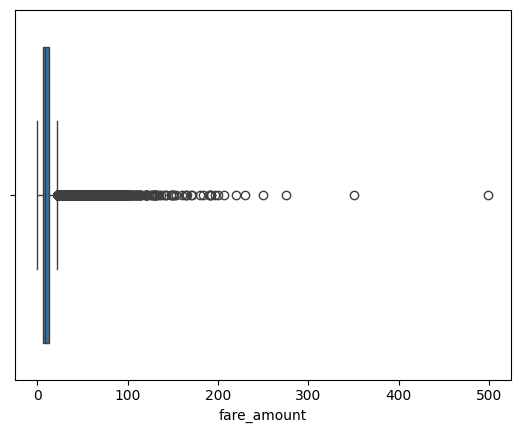

In [7]:
# 1. Pre-process the dataset


df.drop(['Unnamed: 0','key'],axis =1,inplace = True)
df.fillna(method='ffill', inplace=True)
df.drop(df[df['fare_amount'].values<=0].index,inplace=True)
df.drop(df[df['passenger_count']>10].index,inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

df.dropna(inplace=True)

# To fill missing values with the mean value of the column:
# data.fillna(data.mean(), inplace=True)

# Ensure there are no more missing values
missing_values = df.isnull().sum()
print("Missing values after handling:")
print(missing_values)

# 2. Identify outliers
# visualization to detect outliers.
sns.boxplot(x=df["fare_amount"])
plt.show()


In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week
count,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000
mean,11.362648,-72.527844,39.935995,-72.526243,39.924410,1.683449,3.048461
std,9.897104,11.437285,7.720462,13.115114,6.793438,1.306934,1.946970
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,3.000000
75%,12.500000,-73.967155,40.767158,-73.963660,40.768002,2.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,6.000000


In [9]:
# Remove rows where fare_amount is less than or equal to 0 (since Poisson can't handle that)
df = df[df['fare_amount'] > 0]

# Ensure no other invalid values like NaN are present in the dataset
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

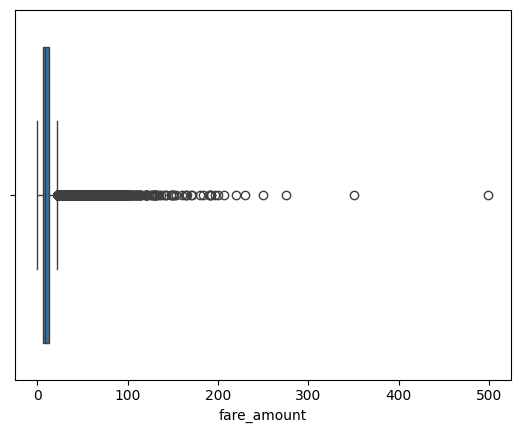

In [10]:
sns.boxplot(x=df["fare_amount"])
plt.show()

In [11]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

C:\Users\anime\AppData\Local\Temp\ipykernel_28568\1690886834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
C:\Users\anime\AppData\Local\Temp\ipykernel_28568\1690886834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

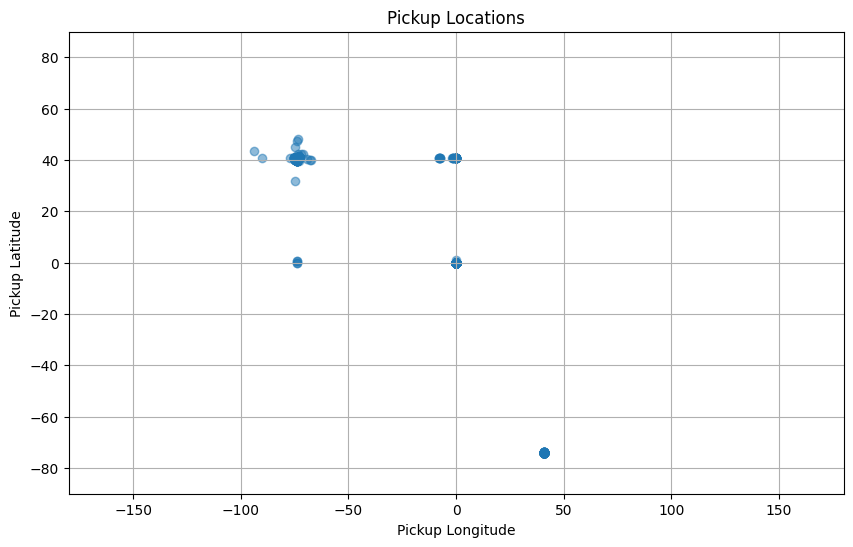

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=0.5)
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.grid()
plt.xlim([-180, 180])  # Set longitude limits
plt.ylim([-90, 90])    # Set latitude limits
plt.show()

In [13]:
# Check for valid latitude and longitude values
invalid_latitude = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]
invalid_longitude = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]

print(f"Invalid Latitude Records:\n{invalid_latitude}")
print(f"Invalid Longitude Records:\n{invalid_longitude}")


Invalid Latitude Records:
       fare_amount           pickup_datetime  pickup_longitude  \
56617          8.1 2012-03-11 07:24:00+00:00        -73.960828   
61793          8.5 2012-06-13 05:45:00+00:00        -73.951385   
75851         15.7 2011-11-05 00:22:00+00:00      -1340.648410   
91422         16.1 2011-05-18 13:24:00+00:00         57.418457   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
56617       404.433332         -73.988357         40.769037                1   
61793       401.066667         -73.982110         40.754117                1   
75851      1644.421482       -3356.666300        872.697628                1   
91422      1292.016128        1153.572603       -881.985513                1   

       day_of_week  
56617            6  
61793            2  
75851            5  
91422            2  
Invalid Longitude Records:
        fare_amount           pickup_datetime  pickup_longitude  \
4949            4.9 2012-04-28 00:58:00+00:

In [14]:
df = df[
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90) &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90) &
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180) &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
]

In [15]:
# Check for valid latitude and longitude values
invalid_latitude = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]
invalid_longitude = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]

print(f"Invalid Latitude Records:\n{invalid_latitude}")
print(f"Invalid Longitude Records:\n{invalid_longitude}")

Invalid Latitude Records:
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, day_of_week]
Index: []
Invalid Longitude Records:
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, day_of_week]
Index: []


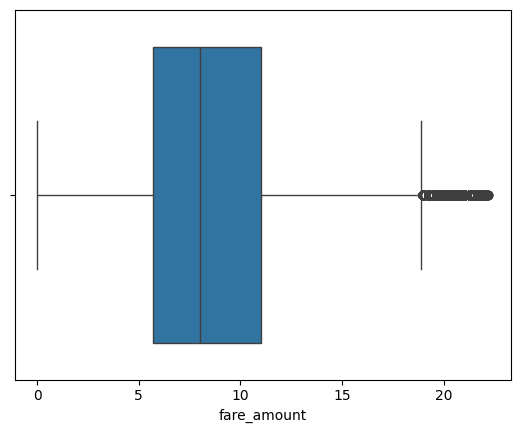

In [16]:
# Calculate the IQR for the 'fare_amount' column
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
data_no_outliers = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day_of_week             Axes(0.125,0.448049;0.352273x0.0939024)
dtype: object

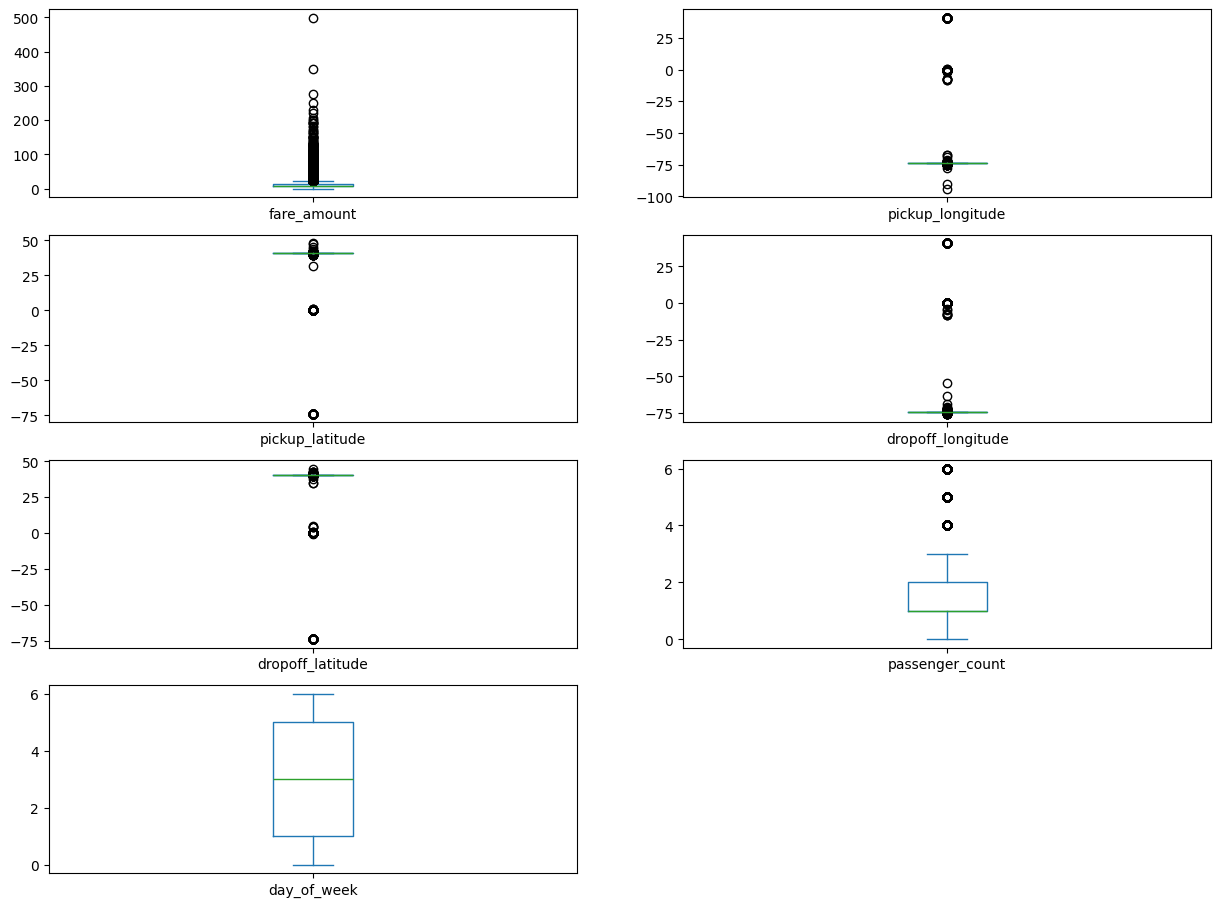

In [17]:
df.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

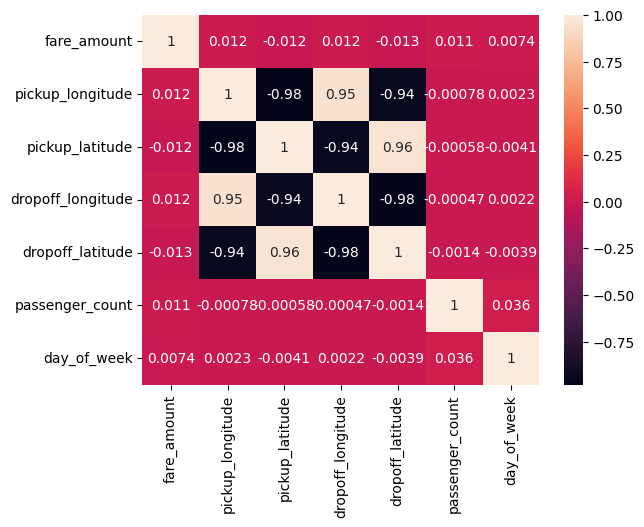

In [18]:
# 3. Check the correlation
# Determine the correlation between features and the target variable (fare_amount).
df_for_corr = df.drop(columns=[ 'pickup_datetime'])

correlation_matrix = df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [19]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']  #Target

y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199965, dtype: float64

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# 4. Implementing Models

# Initialize an empty dictionary to store results
results = {}

In [23]:
# (i) Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

In [24]:
#(ii) Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
   'R2': r2_score(y_test, y_pred_rf),
   'MSE': mean_squared_error(y_test, y_pred_rf),
   'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}

In [25]:
# (iii) XGBRegressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results['XGB Regressor'] = {
    'R2': r2_score(y_test, y_pred_xgb),
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb))
}

In [26]:
# (iv) Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)
results['Elastic Net'] = {
    'R2': r2_score(y_test, y_pred_en),
    'MSE': mean_squared_error(y_test, y_pred_en),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_en))
}

In [27]:
# (vi) Poisson Regression
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
y_pred_poisson = poisson_model.predict(X_test)
results['Poisson Regression'] = {
    'R2': r2_score(y_test, y_pred_poisson),
    'MSE': mean_squared_error(y_test, y_pred_poisson),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poisson))
}

In [28]:
# 5. Evaluate and compare models
results_df = pd.DataFrame(results).T
print(results_df)

                          R2        MSE      RMSE
Linear Regression  -0.000200  94.138611  9.702505
Random Forest       0.768588  21.780453  4.666953
XGB Regressor       0.768377  21.800268  4.669076
Elastic Net        -0.000017  94.121411  9.701619
Poisson Regression -0.031998  97.131423  9.855528


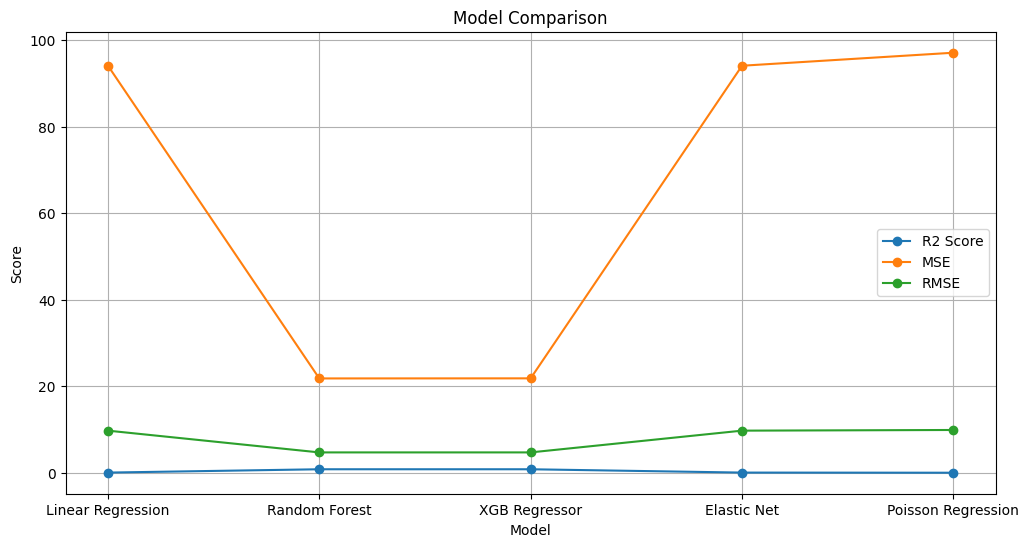

In [29]:
# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['R2'], label='R2 Score', marker='o')
plt.plot(results_df.index, results_df['MSE'], label='MSE', marker='o')
plt.plot(results_df.index, results_df['RMSE'], label='RMSE', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()